<a href="https://colab.research.google.com/github/RaghavendhraRao/stock_market_prediction_ISE_DSFP/blob/main/ds_final_proj_stock_market_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# different numerical results due to floating-point round-off errors from different computation orders.
# To turn them off, set
TF_ENABLE_ONEDNN_OPTS=0

# # fetch dataset
# istanbul_stock_exchange = fetch_ucirepo(id=247)
ise_data = fetch_ucirepo(id=247)


In [ ]:
# check the type of dataset
print("dataset type: ", type(ise_data), "\n")

# print the keys in dataset
print("keys: ", ise_data.keys(), "\n")

# fetch the stock data from the dataset
data_info = ise_data.data['features']
print("data type: ", type(data_info), "\n")

print("print first 5 rows..!")
print(data_info.head(), "\n")

#taking the reference variable
stock_data = data_info

dataset type:  <class 'ucimlrepo.dotdict.dotdict'> 

keys:  dict_keys(['data', 'metadata', 'variables']) 

data type:  <class 'pandas.core.frame.DataFrame'> 

print first 5 rows..!
       date       ISE       ISE        SP       DAX      FTSE    NIKKEI  \
0  5-Jan-09  0.035754  0.035754 -0.004679  0.002193  0.003894  0.000000   
1  6-Jan-09  0.025426  0.025426  0.007787  0.008455  0.012866  0.004162   
2  7-Jan-09 -0.028862 -0.028862 -0.030469 -0.017833 -0.028735  0.017293   
3  8-Jan-09 -0.062208 -0.062208  0.003391 -0.011726 -0.000466 -0.040061   
4  9-Jan-09  0.009860  0.009860 -0.021533 -0.019873 -0.012710 -0.004474   

    BOVESPA        EU        EM  
0  0.031190  0.012698  0.028524  
1  0.018920  0.011341  0.008773  
2 -0.035899 -0.017073 -0.020015  
3  0.028283 -0.005561 -0.019424  
4 -0.009764 -0.010989 -0.007802   



In [ ]:
# printing the summary statistics
# Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values
print(stock_data.describe(),"\n \n")


# information about the dataset
print(stock_data.info(),"\n \n")

# print("\n","Data Columns: ", data_info.columns)

# print("varibles data :")
print(ise_data.variables,"\n \n")


# convert the date datatpe to datetime
print(stock_data['date'].head(),"\n \n")

stock_data['date'] = pd.to_datetime(stock_data['date'], format='%d-%b-%y')
print(stock_data['date'].head(),"\n", "\n")
# print(stock_data.dtypes, "/n")

              ISE         ISE          SP         DAX        FTSE      NIKKEI  \
count  536.000000  536.000000  536.000000  536.000000  536.000000  536.000000   
mean     0.001629    0.001629    0.000643    0.000721    0.000510    0.000308   
std      0.016264    0.016264    0.014093    0.014557    0.012656    0.014850   
min     -0.062208   -0.062208   -0.054262   -0.052331   -0.054816   -0.050448   
25%     -0.006669   -0.006669   -0.004675   -0.006212   -0.005808   -0.007407   
50%      0.002189    0.002189    0.000876    0.000887    0.000409    0.000000   
75%      0.010584    0.010584    0.006706    0.008224    0.007428    0.007882   
max      0.068952    0.068952    0.068366    0.058951    0.050323    0.061229   

          BOVESPA          EU          EM  
count  536.000000  536.000000  536.000000  
mean     0.000935    0.000471    0.000936  
std      0.015751    0.012990    0.010501  
min     -0.053849   -0.048817   -0.038564  
25%     -0.007215   -0.005952   -0.004911  
50%   

In [ ]:
# set the date column as Index
stock_data.set_index('date', inplace=True)

#print few rows
print("First few rows from the stock dataset...!")
print(stock_data.head(),"\n \n")

# check for null values in the dataset
print("Check null values...!")
data_null_values = stock_data.isnull().sum()
print("null values found in dataset: ", data_null_values,"\n \n")

# calculating the mean of each month and restructure the data
print("Calculating the mean for each month...!")
stock_mean_data = stock_data.resample('M').mean()
print(stock_mean_data.head(),"\n \n")

# removing the duplicates in the columns
print("Removinig the duplicate columns...!")
stock_mean_data = stock_mean_data.loc[:, ~stock_mean_data.columns.duplicated()]
print(stock_mean_data.head(),"\n \n")

First few rows from the stock dataset...!
                 ISE       ISE        SP       DAX      FTSE    NIKKEI  \
date                                                                     
2009-01-05  0.035754  0.035754 -0.004679  0.002193  0.003894  0.000000   
2009-01-06  0.025426  0.025426  0.007787  0.008455  0.012866  0.004162   
2009-01-07 -0.028862 -0.028862 -0.030469 -0.017833 -0.028735  0.017293   
2009-01-08 -0.062208 -0.062208  0.003391 -0.011726 -0.000466 -0.040061   
2009-01-09  0.009860  0.009860 -0.021533 -0.019873 -0.012710 -0.004474   

             BOVESPA        EU        EM  
date                                      
2009-01-05  0.031190  0.012698  0.028524  
2009-01-06  0.018920  0.011341  0.008773  
2009-01-07 -0.035899 -0.017073 -0.020015  
2009-01-08  0.028283 -0.005561 -0.019424  
2009-01-09 -0.009764 -0.010989 -0.007802   
 

Check null values...!
null values found in dataset:  ISE        0
ISE        0
SP         0
DAX        0
FTSE       0
NIKKEI     0
BOV

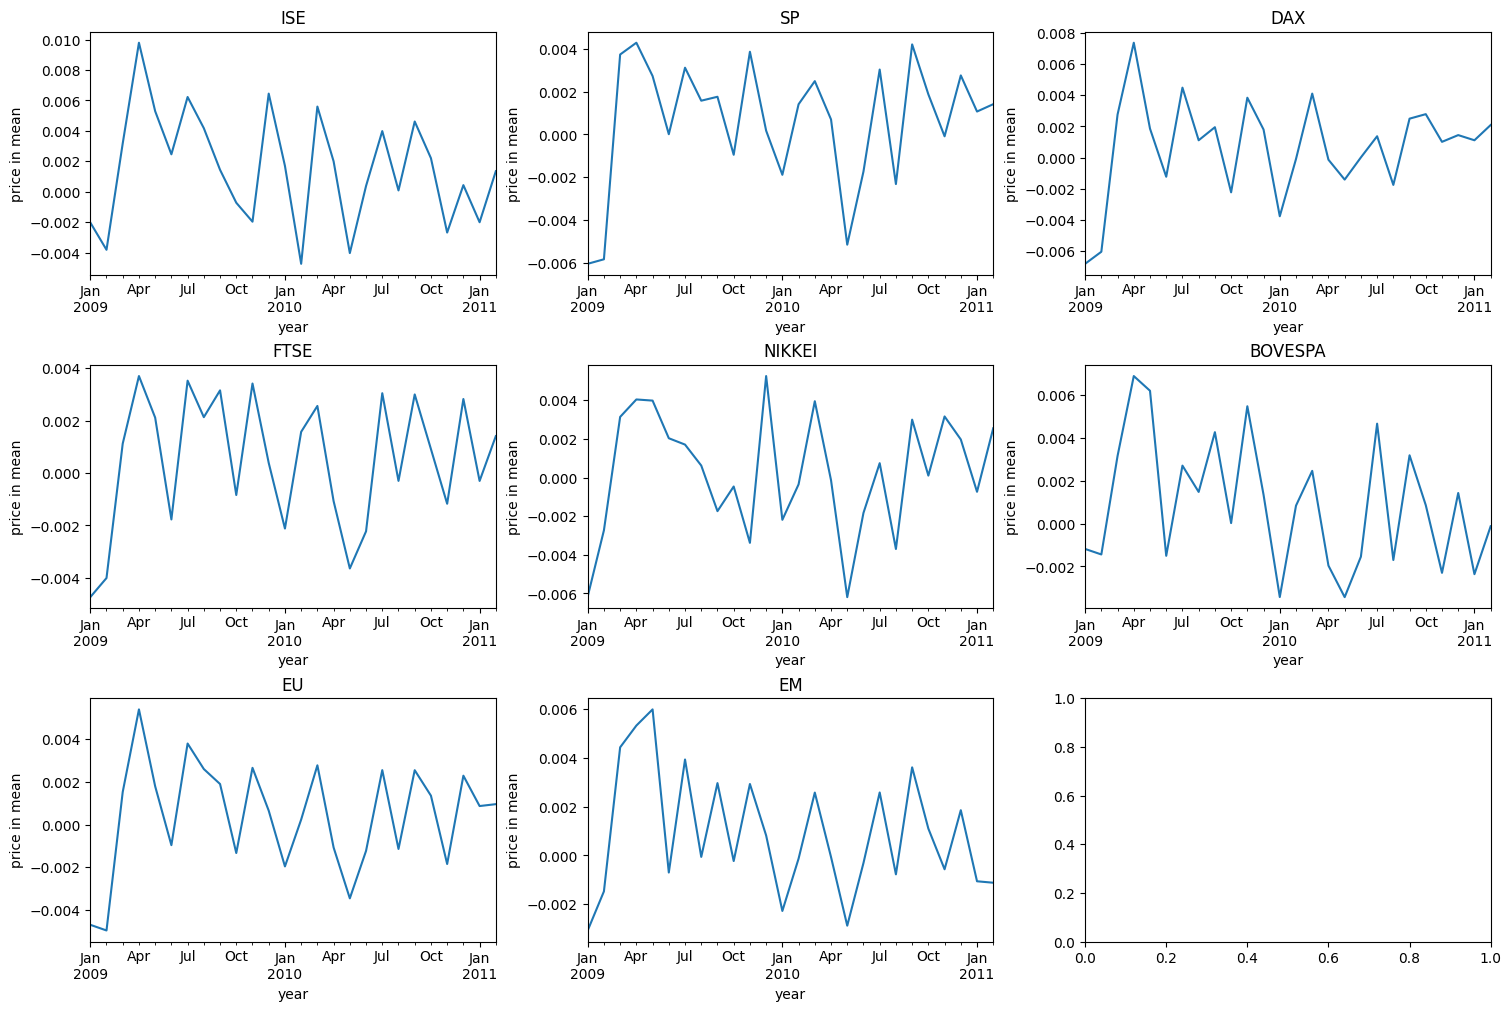

In [ ]:
# Plot each column in the data
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), constrained_layout=True)
data_columns = stock_mean_data.columns
for col, ax in enumerate(axes.flat):
    if col < len(data_columns):
        stock_mean_data[data_columns[col]].plot(ax=ax)
        ax.set_title(data_columns[col])
        ax.set_xlabel('year')
        ax.set_ylabel('price in mean')

plt.show()

In [ ]:
# Identify the key features and targeted feature

X_stock_key_features = ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'] # These features are used to train the model
Y_stock_target = ['ISE'] # to predict the price using the model


In [ ]:
# # normalize the data
# # converting the stock prices to binary values into 0,1
# scaler_data =MinMaxScaler(feature_range=(0,1))
# normalized_data = scaler_data.fit_transform(stock_mean_data[X_stock_key_features + Y_stock_target])

# # split the data into features and target
# X_data = normalized_data[:, :-1]
# Y_data = normalized_data[:, -1]

In [ ]:
# X_data

In [ ]:
# #Reshape the input data into 2D array/shape for LSTM
# allow_timestep =1
# X_data = np.reshape(X_data, (X_data.shape[0], allow_timestep, X_data.shape[1]))
# # X_data.ndim

In [ ]:
# split data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data,
#                                                     test_size=0.7, random_state=42)




In [ ]:
x_train, x_test, y_train, y_test = train_test_split(stock_mean_data[X_stock_key_features], + stock_mean_data[Y_stock_target],
                                                    test_size=0.7, random_state=42)

In [ ]:
# check the data to be in 2d or 3d array
def convert_to_2darray(data_array):
  if data_array.ndim==1:
    data_array=data_array.reshape(-1,1)
    print("array convertes to :", data_array.ndim,"D")
  else:
    print("Didnt converted. Array is in ", data_array.ndim,"D")
  return data_array

In [ ]:
# Convert the target data (y_train, y_test) to 2d array
y_train = convert_to_2darray(y_train)
y_test = convert_to_2darray(y_test)

Didnt converted. Array is in  2 D
Didnt converted. Array is in  2 D


In [ ]:
# # normalize the data
# # converting the stock prices to binary values into 0,1

scaler_data =MinMaxScaler(feature_range=(0,1))

norm_x_train = scaler_data.fit_transform(x_train) # features variable
norm_x_test = scaler_data.transform(x_test)
norm_y_train = scaler_data.fit_transform(y_train) # targeted variable
norm_y_test = scaler_data.transform(y_test)

In [ ]:
# Reshape the input to 2D array to feed into the model
allow_timestep =1
norm_x_train = norm_x_train.reshape((norm_x_train.shape[0], allow_timestep, norm_x_train.shape[1]))
norm_x_test = norm_x_test.reshape((norm_x_test.shape[0], allow_timestep, norm_x_test.shape[1]))
# X_data.ndim

In [ ]:
# Build the LSTM model from scratch
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(norm_x_train.shape[1], norm_x_train.shape[2]))) #layer 1 with 50 units
model.add(Dropout(0.2)) # prevent overfitting given 10% loss for every epoch
model.add(LSTM(units=100)) # layer 2 with 50 units will only return the last output seq
model.add(Dense(1)) # predicting only single values index(ISE) (predict single continuous value)


model.compile(loss='mean_squared_error', #calculate the error (pred & act)
              optimizer=Adam(learning_rate=0.001), #minimize the loss function.
              metrics=['mean_absolute_error']) # compiling the model
model.summary() # model summary


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 100)              │          43,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,701 (483.21 KB)

 Trainable params: 123,701 (483.21 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model
history = model.fit(norm_x_train, norm_y_train, epochs=50, batch_size=16, validation_split=0.2)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.4359 - mean_absolute_error: 0.5726 - val_loss: 0.5034 - val_mean_absolute_error: 0.6095
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - loss: 0.4213 - mean_absolute_error: 0.5639 - val_loss: 0.4866 - val_mean_absolute_error: 0.5990
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.4018 - mean_absolute_error: 0.5552 - val_loss: 0.4697 - val_mean_absolute_error: 0.5884
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 0.3913 - mean_absolute_error: 0.5500 - val_loss: 0.4527 - val_mean_absolute_error: 0.5776
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.3768 - mean_absolute_error: 0.5414 - val_loss: 0.4353 - val_mean_absolute_error: 0.5663
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.3555 - mean_absolute_error: 0.5290 - val_loss: 0.4175 - val_mean_absolute_error: 0.5545
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.3482 - mean_absolute_error: 0.5232 - val_loss: 0.3992 - 

In [ ]:
#Access the training data  to check the loss and MAE
training_hist = history.history

# evaluate model
train_loss, train_mean_absolute_error = model.evaluate(norm_x_test, norm_y_test)
print("\n")
print("training loss: ", train_loss)
print(f'Mean absolute error: {train_mean_absolute_error}')


#predict the model on test dataset
y_pred= model.predict(norm_x_test)

# print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1002 - mean_absolute_error: 0.2559


training loss:  0.10019544512033463
Mean absolute error: 0.2559211552143097
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


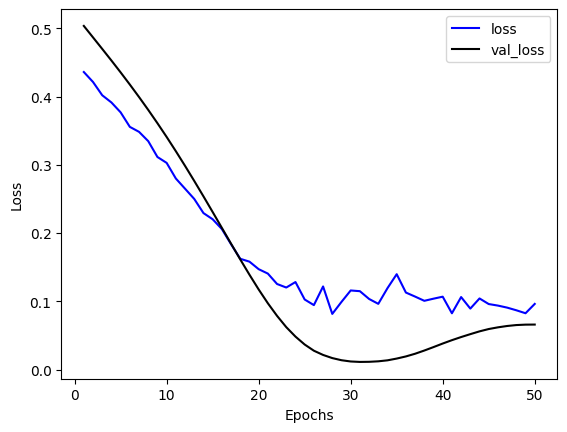

In [ ]:
# visualize the training history
training_loss = training_hist['loss']
training_val_loss = training_hist['val_loss']
training_epochs = range(1, len(training_loss)+1)

plt.plot(training_epochs, training_loss, 'b', label='loss')
plt.plot(training_epochs, training_val_loss, 'black', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# convert the y_prediction to 2d array to be in same path
norm_y_pred = convert_to_2darray(y_pred)

Didnt converted. Array is in  2 D


In [ ]:
# Inverse transform the predictions and actual values
y_pred_inverse = scaler_data.inverse_transform(norm_y_pred)
y_test_inverse = scaler_data.inverse_transform(norm_y_test)

# Generate range for plotting
train_range = range(len(y_train))
test_range = range(len(y_train), len(y_train) + len(y_test))


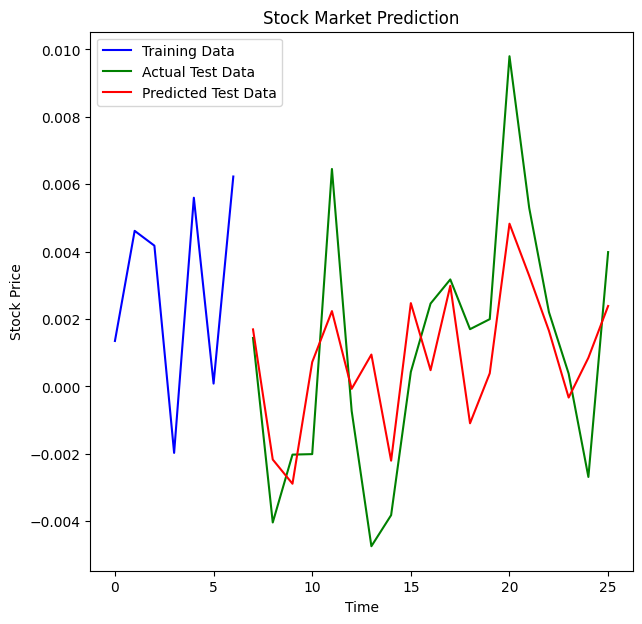

In [ ]:
# Plotting the actual vs predicted values
plt.figure(figsize=(7, 7))

# Plot training data
plt.plot(train_range, y_train, label='Training Data', color='blue')

# Plot test data
plt.plot(test_range, y_test_inverse, label='Actual Test Data', color='green')

# Plot predicted data
plt.plot(test_range, y_pred_inverse, label='Predicted Test Data', color='red')

plt.title('Stock Market Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
lstm_mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
print(f'Test Mean Absolute Error for ARIMA: {lstm_mae}')

Test Mean Absolute Error for ARIMA: 0.0020991100287546848


In [ ]:
# Calculate MSE and RMSE
mse_lstm = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse_lstm = np.sqrt(mse_lstm)
print(f'Test Mean Squared Error for LSTM: {mse_lstm}')
print(f'Test Root Mean Squared Error for LSTM: {rmse_lstm}')

# Calculate the mean of the true values
mean_y_test = np.mean(y_test_inverse)

# Calculate percentage errors
percentage_mse_lstm = (mse_lstm / mean_y_test) * 100
percentage_rmse_lstm = (rmse_lstm / mean_y_test) * 100
print(f'Test Mean Squared Error for LSTM (Percentage): {percentage_mse_lstm}%')
print(f'Test Root Mean Squared Error for LSTM (Percentage): {percentage_rmse_lstm}%')


Test Mean Squared Error for LSTM: 6.740714499012292e-06
Test Root Mean Squared Error for LSTM: 0.0025962886008709224
Test Mean Squared Error for LSTM (Percentage): 0.6644686568741504%
Test Root Mean Squared Error for LSTM (Percentage): 255.9301984576195%


**with feature extraction**

In [ ]:
stock_mean_data.head()

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,
2009-01-31,-0.002024,-0.006033,-0.006827,-0.004735,-0.006165,-0.001186,-0.004690,-0.003085
2009-02-28,-0.003820,-0.005823,-0.006052,-0.004006,-0.002736,-0.001443,-0.004956,-0.001480
2009-03-31,0.003175,0.003725,0.002764,0.001125,0.003139,0.003153,0.001523,0.004435
2009-04-30,0.009799,0.004275,0.007379,0.003704,0.004044,0.006883,0.005386,0.005328
2009-05-31,0.005297,0.002722,0.001858,0.002117,0.003984,0.006196,0.001789,0.005993


In [ ]:
corr_matrix = stock_mean_data.corr()

In [ ]:
corr_matrix

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
ISE,1.000000,0.600852,0.633582,0.581647,0.695239,0.601475,0.707693,0.679054
SP,0.600852,1.000000,0.881199,0.924487,0.696451,0.747354,0.934647,0.823068
DAX,0.633582,0.881199,1.000000,0.852492,0.650629,0.694348,0.917721,0.777007
FTSE,0.581647,0.924487,0.852492,1.000000,0.573246,0.824994,0.956926,0.816627
NIKKEI,0.695239,0.696451,0.650629,0.573246,1.000000,0.467362,0.625225,0.616998
BOVESPA,0.601475,0.747354,0.694348,0.824994,0.467362,1.000000,0.796050,0.910038
EU,0.707693,0.934647,0.917721,0.956926,0.625225,0.796050,1.000000,0.817983
EM,0.679054,0.823068,0.777007,0.816627,0.616998,0.910038,0.817983,1.000000


In [ ]:
import seaborn as sns

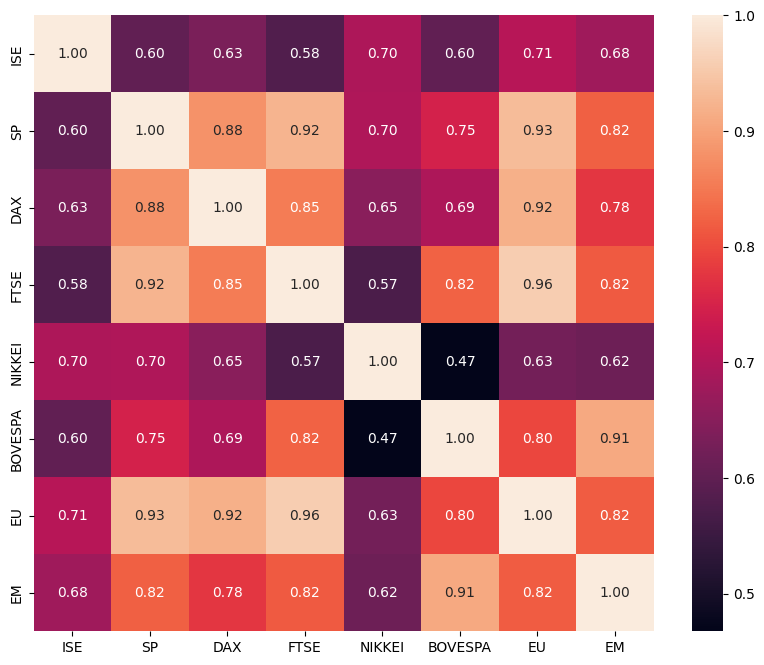

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot =  True, fmt = ".2f")
plt.show()

In [ ]:
stock_feature_extracted = stock_mean_data.drop(columns = ['FTSE','EU','EM'])

In [ ]:
stock_feature_extracted.head()

,ISE,SP,DAX,NIKKEI,BOVESPA
date,,,,,
2009-01-31,-0.002024,-0.006033,-0.006827,-0.006165,-0.001186
2009-02-28,-0.003820,-0.005823,-0.006052,-0.002736,-0.001443
2009-03-31,0.003175,0.003725,0.002764,0.003139,0.003153
2009-04-30,0.009799,0.004275,0.007379,0.004044,0.006883
2009-05-31,0.005297,0.002722,0.001858,0.003984,0.006196


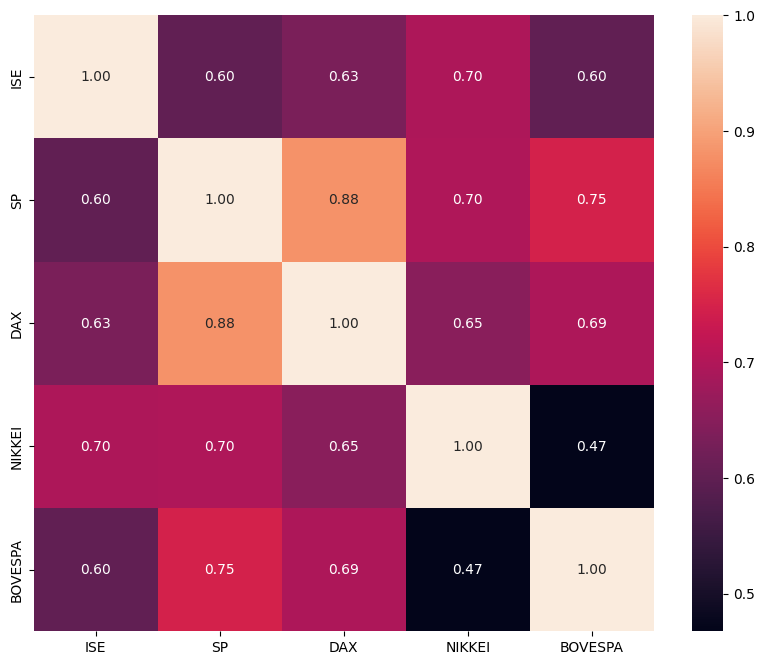

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(stock_feature_extracted.corr(), annot =  True, fmt = ".2f")
plt.show()

In [ ]:
x = ['SP', 'DAX', 'NIKKEI', 'BOVESPA']
y = ['ISE']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(stock_mean_data[x], + stock_mean_data[y],
                                                    test_size=0.7, random_state=42)

In [ ]:
x_train.head()

,SP,DAX,NIKKEI,BOVESPA
date,,,,
2011-02-28,0.001409,0.002092,0.002553,-0.000127
2010-09-30,0.004196,0.002500,0.002998,0.003185
2009-08-31,0.001572,0.001111,0.000620,0.001475
2009-11-30,0.003854,0.003845,-0.003385,0.005472
2010-03-31,0.002484,0.004110,0.003953,0.002459


In [ ]:
y_train

,ISE
date,
2011-02-28,0.001349
2010-09-30,0.004617
2009-08-31,0.004178
2009-11-30,-0.001973
2010-03-31,0.005600
2010-08-31,0.000084
2009-07-31,0.006229


In [ ]:
x_test

,SP,DAX,NIKKEI,BOVESPA
date,,,,
2009-09-30,0.001755,0.001950,-0.001742,0.004264
2010-05-31,-0.005142,-0.001416,-0.006196,-0.003435
2009-01-31,-0.006033,-0.006827,-0.006165,-0.001186
2011-01-31,0.001066,0.001112,-0.000739,-0.002363
2009-12-31,0.000175,0.001800,0.005256,0.001341
2009-10-31,-0.000950,-0.002235,-0.000465,0.000022
2010-02-28,0.001406,-0.000092,-0.000354,0.000835
2009-02-28,-0.005823,-0.006052,-0.002736,-0.001443
2010-12-31,0.002750,0.001443,0.001972,0.001426


In [ ]:
y_test

,ISE
date,
2009-09-30,0.001439
2010-05-31,-0.004038
2009-01-31,-0.002024
2011-01-31,-0.002009
2009-12-31,0.006453
2009-10-31,-0.000727
2010-02-28,-0.004742
2009-02-28,-0.003820
2010-12-31,0.000433


In [ ]:
# Convert the target data (y_train, y_test) to 2d array
y_train = convert_to_2darray(y_train)
y_test = convert_to_2darray(y_test)

Didnt converted. Array is in  2 D
Didnt converted. Array is in  2 D


In [ ]:
# # normalize the data
# # converting the stock prices to binary values into 0,1

scaler_data =MinMaxScaler(feature_range=(0,1))

norm_x_train = scaler_data.fit_transform(x_train) # features variable
norm_x_test = scaler_data.transform(x_test)
norm_y_train = scaler_data.fit_transform(y_train) # targeted variable
norm_y_test = scaler_data.transform(y_test)

In [ ]:
# Reshape the input to 2D array to feed into the model
allow_timestep =1
norm_x_train = norm_x_train.reshape((norm_x_train.shape[0], allow_timestep, norm_x_train.shape[1]))
norm_x_test = norm_x_test.reshape((norm_x_test.shape[0], allow_timestep, norm_x_test.shape[1]))
# X_data.ndim

In [ ]:
# train the model
history = model.fit(norm_x_train, norm_y_train, epochs=50, batch_size=16, validation_split=0.2)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.4341 - mean_absolute_error: 0.5702 - val_loss: 0.5104 - val_mean_absolute_error: 0.6131
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4208 - mean_absolute_error: 0.5603 - val_loss: 0.4961 - val_mean_absolute_error: 0.6041
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4049 - mean_absolute_error: 0.5547 - val_loss: 0.4820 - val_mean_absolute_error: 0.5950
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.3967 - mean_absolute_error: 0.5515 - val_loss: 0.4678 - val_mean_absolute_error: 0.5858
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.3801 - mean_absolute_error: 0.5393 - val_loss: 0.4535 - val_mean_absolute_error: 0.5764
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.3652 - mean_absolute_error: 0.5314 - val_loss: 0.4390 - val_mean_absolute_error: 0.5667
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.3511 - mean_absolute_error: 0.5243 - val_loss: 0.4242 - val_m

In [ ]:
#Access the training data  to check the loss and MAE
training_hist = history.history

# evaluate model
train_loss, train_mean_absolute_error = model.evaluate(norm_x_test, norm_y_test)
print("\n")
print("training loss: ", train_loss)
print(f'Mean absolute error: {train_mean_absolute_error}')


#predict the model on test dataset
y_pred= model.predict(norm_x_test)

# print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1070 - mean_absolute_error: 0.2496


training loss:  0.10697361081838608
Mean absolute error: 0.2496134340763092
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


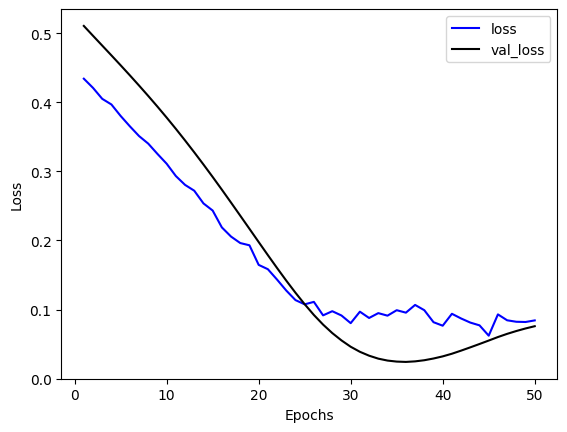

In [ ]:
# visualize the training history
training_loss = training_hist['loss']
training_val_loss = training_hist['val_loss']
training_epochs = range(1, len(training_loss)+1)

plt.plot(training_epochs, training_loss, 'b', label='loss')
plt.plot(training_epochs, training_val_loss, 'black', label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# convert the y_prediction to 2d array to be in same path
norm_y_pred = convert_to_2darray(y_pred)

Didnt converted. Array is in  2 D


In [ ]:
# Inverse transform the predictions and actual values
y_pred_inverse = scaler_data.inverse_transform(norm_y_pred)
y_test_inverse = scaler_data.inverse_transform(norm_y_test)

# Generate range for plotting
train_range = range(len(y_train))
test_range = range(len(y_train), len(y_train) + len(y_test))


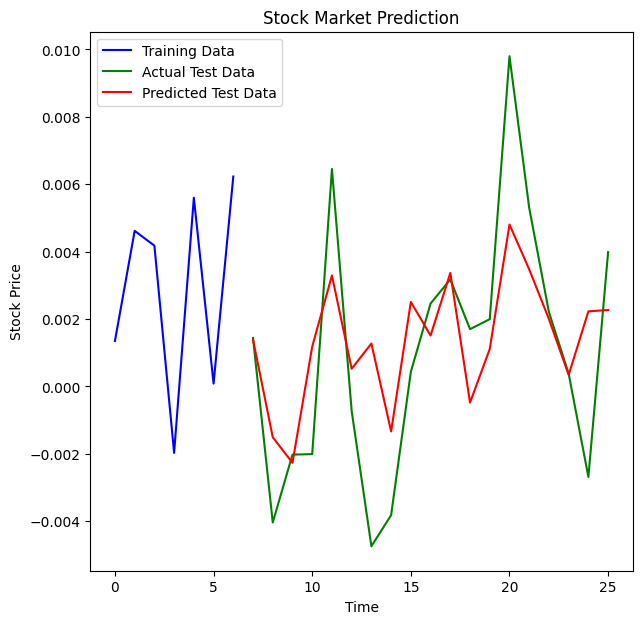

In [ ]:
# Plotting the actual vs predicted values
plt.figure(figsize=(7, 7))

# Plot training data
plt.plot(train_range, y_train, label='Training Data', color='blue')

# Plot test data
plt.plot(test_range, y_test_inverse, label='Actual Test Data', color='green')

# Plot predicted data
plt.plot(test_range, y_pred_inverse, label='Predicted Test Data', color='red')

plt.title('Stock Market Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
lstm_mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
print(f'Test Mean Absolute Error for ARIMA: {lstm_mae}')

Test Mean Absolute Error for ARIMA: 0.002047372844360894


In [ ]:
# Calculate MSE and RMSE
mse_lstm = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse_lstm = np.sqrt(mse_lstm)
print(f'Test Mean Squared Error for LSTM: {mse_lstm}')
print(f'Test Root Mean Squared Error for LSTM: {rmse_lstm}')

# Calculate the mean of the true values
mean_y_test = np.mean(y_test_inverse)

# Calculate percentage errors
percentage_mse_lstm = (mse_lstm / mean_y_test) * 100
percentage_rmse_lstm = (rmse_lstm / mean_y_test) * 100
print(f'Test Mean Squared Error for LSTM (Percentage): {percentage_mse_lstm}%')
print(f'Test Root Mean Squared Error for LSTM (Percentage): {percentage_rmse_lstm}%')


Test Mean Squared Error for LSTM: 7.1967197075158495e-06
Test Root Mean Squared Error for LSTM: 0.0026826702569484476
Test Mean Squared Error for LSTM (Percentage): 0.709419554656036%
Test Root Mean Squared Error for LSTM (Percentage): 264.44530512781125%
